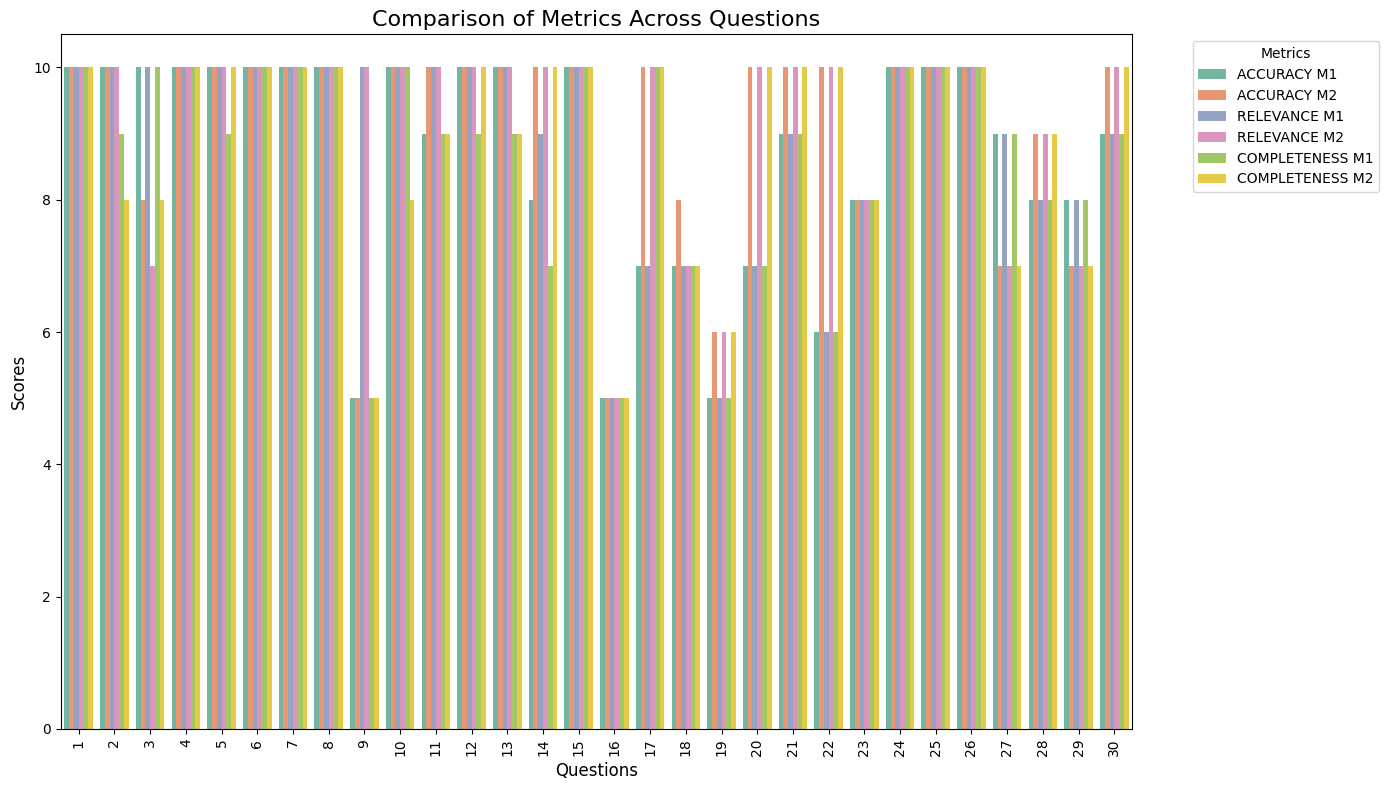

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the chart
data = {
    "QUESTIONS": list(range(1, 31)),
    "ACCURACY M1": [10, 10, 10, 10, 10, 10, 10, 10, 5, 10, 9, 10, 10, 8, 10, 5, 7, 7, 5, 7, 9, 6, 8, 10, 10, 10, 9, 8, 8, 9],
    "ACCURACY M2": [10, 10, 8, 10, 10, 10, 10, 10, 5, 10, 10, 10, 10, 10, 10, 5, 10, 8, 6, 10, 10, 10, 8, 10, 10, 10, 7, 9, 7, 10],
    "RELEVANCE M1": [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 5, 7, 7, 5, 7, 9, 6, 8, 10, 10, 10, 9, 8, 8, 9],
    "RELEVANCE M2": [10, 10, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 10, 7, 6, 10, 10, 10, 8, 10, 10, 10, 7, 9, 7, 10],
    "COMPLETENESS M1": [10, 9, 10, 10, 9, 10, 10, 10, 5, 10, 9, 9, 9, 7, 10, 5, 10, 7, 5, 7, 9, 6, 8, 10, 10, 10, 9, 8, 8, 9],
    "COMPLETENESS M2": [10, 8, 8, 10, 10, 10, 10, 10, 5, 8, 9, 10, 9, 10, 10, 5, 10, 7, 6, 10, 10, 10, 8, 10, 10, 10, 7, 9, 7, 10]
}

df = pd.DataFrame(data)

# Reshape the data for Seaborn
df_melted = pd.melt(
    df,
    id_vars=["QUESTIONS"],
    value_vars=["ACCURACY M1", "ACCURACY M2", "RELEVANCE M1", "RELEVANCE M2", "COMPLETENESS M1", "COMPLETENESS M2"],
    var_name="Metrics",
    value_name="Scores"
)

# Extract Metric Type and Model from the column names
df_melted["Metric"] = df_melted["Metrics"].str.extract(r"(ACCURACY|RELEVANCE|COMPLETENESS)")
df_melted["Model"] = df_melted["Metrics"].str.extract(r"(M1|M2)")


plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_melted,
    x="QUESTIONS",
    y="Scores",
    hue="Metrics",
    palette="Set2",
    dodge=True
)


plt.title("Comparison of Metrics Across Questions", fontsize=16)
plt.xlabel("Questions", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()
